# Introduction to Data Science - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 31, 11:59pm.

In this homework you will read in and analyze a games dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

*First Name: Nathaniel*   
*Last Name: Hayward*   
*E-mail: nate.hayward@hsc.utah.edu*   
*UID: U6031381*  


In [1]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Basic Way

In this part we'll do some manual analysis of an Iphone Strategy Games dataset.

### Task 1.1: Read in the data

Parse the file [games.csv](games.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "Rating" and the "Number of Ratings" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, the number of rows and columns, and Row 50 of the table.

In [32]:
#initialize the top-level array 
games = []

#create empty list to store header values
header = []

# open the file and append rows as arrays to the games list 
with open('games.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')

    #for each row, append the row to the games array
    for row in filereader:
        games.append(row)

# Store the header in a separate array and remove the header row from dataset
header = games.pop(0)

#ensure rating and number of ratings are cast to appropriate data types for calculations
for row in games:
    row[3] = float(row[3]) #convert ratings column to data type 'float'
    row[4] = int(row[4]) #convert number of ratings to data type 'int'

num_rows = len(games)
num_cols = len(header)
print(header) #print header 

print(f"The number of rows is {num_rows}") #print the number of rows
print(f"The number of columns is {num_cols}") #print the number of colums
print(games[49]) #Print row 50 of the table


['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']
The number of rows is 15668
The number of columns is 11
['World of Tanks Blitz™', '859204347', 'Free', 4.61428, 127265, 'WARGAMING Group Limited', '3992943616', '12', '12+', 'Strategy', '2014']


### Task 1.2:  Calculate game stats

In this task, you will calculate some statistics about games. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

#### Task 1.2.2: Calculate average rating for major games

Compute the average rating for the games that have more than 250 ratings in your loaded dataset and print the output. (We'll call these games with more than 250 ratings major games from now on).

Your output could look like this:
    
    Average rating for major games: xxx.xxxx, Total major games: xx

#### Task 1.2.3: Find the highest and the lowest rated major games

Determine which major game has the highest rating and which has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: GAME TITLE
    Lowest rating: xxx.xxxx, Title: GAME TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the rating relationship of major games to all games?
 * Are major games typically better than the average of all games?

In [52]:
av_rating = [] #create average rating empty list
av_m_game = [] #create average major game empty list
high_m_game = None #dummy variable for highest_rated_game
low_m_game = None #dummy variable for lowest_rated_game 

#iterate through the row to answer each stat question
for row in games:
    av_rating.append(row[3]) #append 'Rating' data to av_rating array
    if row[4] > 250:
        av_m_game.append(row[3]) #append 'Rating' data for only major games with more than 250 ratings
        rating = row[3] #set rating of major game through iteration to variable rating for if statement below
        title = row[0] #set title of major game through iteration to variable title for if statement below

        if high_m_game is None or rating > high_m_game[1]: #if condition true, set high_m_game to title and rating and continue iterating to find max rating
            high_m_game = (title, rating)

        if low_m_game is None or rating < low_m_game[1]: #if condition true, set low_m_game to title and rating and continue iterating to find min rating
            low_m_game = (title, rating)


average1 = sum(av_rating) / len(av_rating) #compute average rating for all games 
total_games = len(av_rating) #compute total number of games

average_major = sum(av_m_game) / len(av_m_game) #compute average rating for all major games
total_major_games = len(av_m_game) #compute total number of major games 

print(f'Average rating: {average1:.4f}, Total games: {total_games}') 
print(f'Average rating for major games: {average_major:.4f}, Total major games: {total_major_games}')
print(f'Highest rated major game: {high_m_game[1]:.4f}, Title: {high_m_game[0]}')
print(f'Lowest rated major game: {low_m_game[1]:.4f}, Title: {low_m_game[0]}')


Average rating: 2.8902, Total games: 15668
Average rating for major games: 4.5203, Total major games: 2490
Highest rated major game: 4.9916, Title: Crazy Rolling Hero
Lowest rated major game: 1.5889, Title: Three Kingdoms Killing


**Your Interpretation**: 
* The relationship of the major games to all games is that the average rating for the major games is significantly higher compared to the average rating for all games. This could be due to the fact that the games with lower amount of ratings tend to be more affected by lower ratings because the relative contribution of each rating contributes more to the average.
* Major games are typically better or higher rated than the average of all games. They may not indeed be better games but because they are more popular they are more highly rated.

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [95]:
games = pd.read_csv("games.csv") #read csv filt and create datafram

rows, columns = games.shape #determine shape of the file, create variables for number of rows and columns
print(f"The file has {rows} rows and {columns} columns.\n")

#display data types
print(games.dtypes)

#display head of the dataset
games.head()

The file has 15668 rows and 11 columns.


App Name               object
App ID                  int64
Price                  object
Rating                float64
Number of Ratings       int64
Developer              object
Size                    int64
Minimum OS Version     object
Content Rating         object
Genre                  object
Year                    int64
dtype: object


,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year
0,Boom Beach: War Strategy Game,672150402,Free,4.70967,287246,Supercell Oy,604057600,12,9+,Action,2014
1,State.io - Conquer the World,1559032748,Free,4.54875,198271,AI GAMES FZ LLC,274869248,13,12+,Strategy,2021
2,Two Spies,1466304408,Free,4.74081,11235,"Royal Pixel Service, Ltd.",92142592,13,9+,Board,2019
3,Forge of Empires: Build a City,711455226,Free,4.60095,164179,InnoGames GmbH,388532224,12,9+,Entertainment,2014
4,Clash of Clans,529479190,Free,4.75467,2571858,Supercell Oy,420755456,12,9+,Action,2012


**Your Interpretation**
* In total I loaded 15668 rows and 11 columns
* The columns are of various data types including float, int and objects
* Contrary to problem 1 above, I did not have to do any manual data type conversion as the pandas read function was able to delineate the most likely data type for each column/variable.
* Even though pandas determined the data type it is still possible to convert this if needed. 
* In addition I did not have to alter the header row to read the data or pop it out of the dataframe for analysis.

### Task 2.2: Calculate the average rating

Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

In [68]:
#determine average of Rating columns for all games
pd_average = games['Rating'].mean()

#create variable for amount of rows in the dataframe
pd_total = games.shape[0]

print(f'Average rating: {pd_average:.4f}, Total games: {pd_total}')

Average rating: 2.8902, Total games: 15668


### Task 2.3: Compare the runtime

We want to measure how long it takes to calculate the average using Pandas versus using a for loop (you can copy the relevant parts from Task 1). This is a fast calculation, so running once is not enough. Instead, run both calcuations 1000 times (in a loop) and measure the time for the entire loop.

To measure, use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to collect timestamps before and after the loop. The total time is the difference between those timestamps.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
 Time the Part 1 way: xxx.xxx s\
 Time using Pandas: xxx.xxx s\
 Difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [182]:
import time

#number of iterations to run
num_iterations = 1000

#timing the basic method
start_time = time.process_time()
for _ in range(num_iterations):
    av_rating = []
    for _, row in games.iterrows():
        av_rating.append(row["Rating"])
    average1 = sum(av_rating) / len(av_rating)
end_time = time.process_time()
basic_time = end_time - start_time

#timing the Pandas method
start_time = time.process_time()
for _ in range(num_iterations):
    pd_average = games["Rating"].mean()
end_time = time.process_time()
pandas_time = end_time - start_time

#calculate difference between time for iterations
difference_factor = basic_time / pandas_time

#print results
print(f"Time the Part 1 way: {loop_time:.3f} s")
print(f"Time using Pandas: {pandas_time:.3f} s")
print(f"Difference factor: {difference_factor:.3f}")

Time the Part 1 way: 13.836 s
Time using Pandas: 0.013 s
Difference factor: 10619.360


**Your Interpretation**
* I tried this with various amounts of iterations to see how much time the difference would take.
* The difference is substantial by a factor of over 10,000 which could save a lot of time especially if these calculations were compounding or other parts of code were reliant on these dataframes being created.
* It is clear from this test that the pandas function that is built-in is using some back-end coding to create more efficiencies that are not the case using my manual calculation method.

### Task 2.4: Filter out Rows

The whole games dataset has about 15,000 games. Use pandas to filter your dataframe to contain only the major games. Then print the total.

E.g.:
    xxx.xxx games have more than 250 ratings.

In [77]:
#create mask for games with number of ratings > 250
mask = games["Number of Ratings"] > 250

#determine number of games with this criteria based on length of mask created above
major_filter = len(games[mask])

#print the result
print(f'{major_filter} games have more than 250 ratings.')

2490 games have more than 250 ratings.


### Task 2.5: Calculate the average rating for major games

Compute the average rating for the major games.
Your output could look like this:
    
    Average rating of major games: xxx.xxxx

In [197]:
#create mask for games with number of ratings > 250
mask = games["Number of Ratings"] > 250

#create new dataframe with mask criteria above
average_major = games[mask]

#determine average rating/average of rating column (which will be the average of all major games since this is all that is in new df.
average_m_rating = average_major["Rating"].mean()

#print output
print(f'Average rating of major games: {average_m_rating:.4f}')

Average rating of major games: 4.5203


### Task 2.6: Find the highest and lowest rated major games

Find the highest rated major game and the lowest major game in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element.

Print the title and the rating.

Your output could look like this:
    
    Highest rated game: TITLE, rating: x.x
    Lowest rated game: TITLE, rating: x.x


In [178]:
#use idxmax() to find the max rating
max_rating = pd_major_games["Rating"].idxmax()
#use idxmin() to find the min rating
min_rating = pd_major_games["Rating"].idxmin()

#find title and rating location row for the above variables
max_rating_title = pd_major_games.loc[max_rating] #finds data for max rating
min_rating_title = pd_major_games.loc[min_rating] #finds data for min rating

# Print the results
print(f"Highest rated game: {max_rating_title['App Name']}, rating: {max_rating_title['Rating']}")
print(f"Lowest rated game: {min_rating_title['App Name']}, rating: {min_rating_title['Rating']}")

Highest rated game: Crazy Rolling Hero, rating: 4.99162
Lowest rated game: Three Kingdoms Killing, rating: 1.58894


### Task 2.7: Create genre subset frames

From the major games you filtered out in a previous task, find out 
 * How many are Entertainment.
 * How many are Puzzle.
 * How many are both Entertainment and Puzzle.
 
Create new dataframes for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major games are Entertainment.
    xxx.xxx major games are Puzzle.
    xxx.xxx major games are both, Entertainment and Puzzle.

In [144]:
#create mask for games with number of ratings > 250
mask = games["Number of Ratings"] > 250

#create new dataframe with mask criteria above
pd_major_games = games[mask]

#filter major games with genre = entertainment and create new df
pd_entertain = pd_major_games[pd_major_games["Genre"] == "Entertainment"]

#filter major games with genre = puzzle and create new df
pd_puzzle = pd_major_games[pd_major_games["Genre"] == "Puzzle"]

#filter major games with genre = entertainment OR puzzle and create new df
pd_enter_puzzle = pd_major_games[pd_major_games["Genre"].isin(["Entertainment", "Puzzle"])]

#print results
print(f'{len(pd_entertain)} major games are Entertainment.')
print(f'{len(pd_puzzle)} major games are Puzzle.')
print(f'{len(pd_enter_puzzle)} major games are both, Entertainment and Puzzle.')

326 major games are Entertainment.
90 major games are Puzzle.
416 major games are both, Entertainment and Puzzle.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for Entertainment and Puzzle among the major games.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [147]:
#create comparison df, finds games with genre = entertainment and puzzle, groups them by genre and then computes calculations on rating column
major_compare = pd_major_games[pd_major_games["Genre"].isin(["Entertainment", "Puzzle"])] \
    .groupby("Genre")["Rating"].agg(["mean", "max", "min", "std", "median"])

#print results
print(major_compare)

                   mean      max      min       std    median
Genre                                                        
Entertainment  4.498537  4.93846  2.48287  0.340949  4.586470
Puzzle         4.498354  4.88914  3.46572  0.293509  4.599965


**Your Interpretation**
* These numbers can tell us some things about the genre subcategories.
* Looking at the table we can see that the average rating of these categories is fairly similar and nearly identical
* The maximum value for entertainment is higher than the maximum puzzle game and the minimum value for entertainment is lower than the minimum puzzle game.
* Taken together with the standard deviation it would appear that although the averages and medians are similar there is more variation in the entertainment games than the puzzle games.
* This trend could suggest that while entertainment games can be more highly rated, the overall rating of puzzle games is generally higher i.e. there is less variation so the rating of puzzle games is more consistent.
* If someone was creating a puzzle game there is a greater change that it will receive a mid-high rating, whereas an entertainment game could be more popular, but when they are not favorable they are really not favorable so they would appear to be more polarizing.

### Task 2.9: Major games over time

Calculate how many major games in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of games
    2008    xxx
    2009    xxx
    ...     ...

Use this data to render a line chart of the number of games per year.

In [118]:
#Display how many major games in dataset were made each year, sorted by year
pd_games_per_year = pd_major_games["Year"].value_counts().sort_index()

#print result, sorted by year
print(pd_games_per_year)

Year
2008      4
2009     27
2010     29
2011     32
2012     67
2013     96
2014    103
2015    147
2016    209
2017    214
2018    236
2019    246
2020    249
2021    222
2022    228
2023    202
2024    178
2025      1
Name: count, dtype: int64


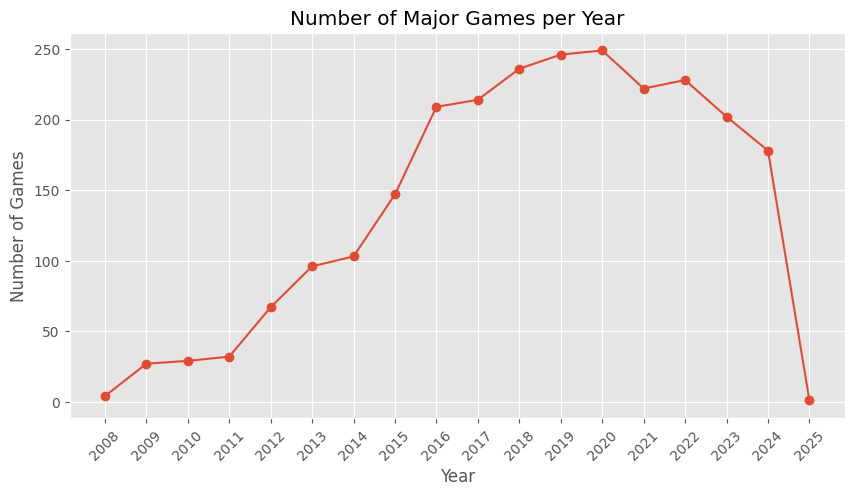

In [158]:
#plot line chart of number of games vs. year
plt.figure(figsize=(10, 5))
plt.plot(pd_games_per_year.index, pd_games_per_year.values,marker = 'o', linestyle='solid')

#add labels, ticks, and title
plt.xticks(ticks=range(2008, 2026), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Number of Major Games per Year")

#display plot
plt.show()

### Task 2.10: Yearly average

Compute the average rating per year for all major games.\
Use the numbers you computed to plot a line chart. Plot the year on x-axis and the average rating on y-axis.  

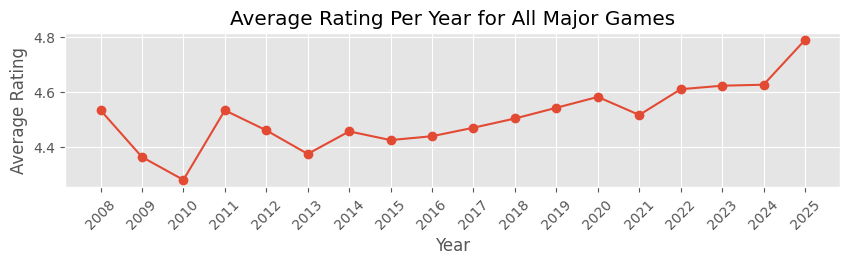

In [161]:
#create filter to group major games by year and compute mean of rating column
pd_average_year = pd_major_games.groupby("Year")["Rating"].agg(["mean"])

#pd_average_year.head(10)

#plot line chart of average rating vs. year
plt.figure(figsize=(10, 2))
plt.plot(pd_average_year.index, pd_average_year.values,marker = 'o', linestyle='solid')

#add labels, ticks, and title
plt.xticks(ticks=range(2008, 2026), rotation=45)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Rating Per Year for All Major Games")

#display plot
plt.show()

### Task 2.11: Explore and Interpret

Why is there so much spread (zig-zag) in the number of ratings in earlier years?

Is 250 ratings a good threshold for the title 'major' games? 

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of ratings per year, the average number of ratings for a game in a particular year, etc. 

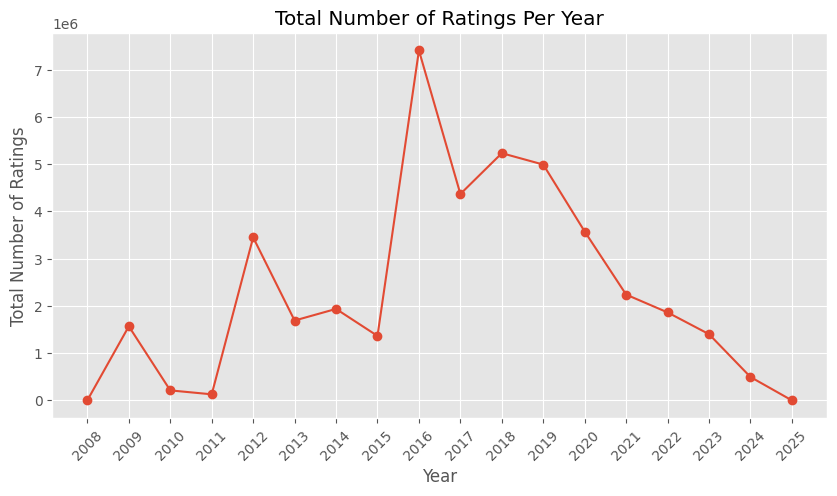

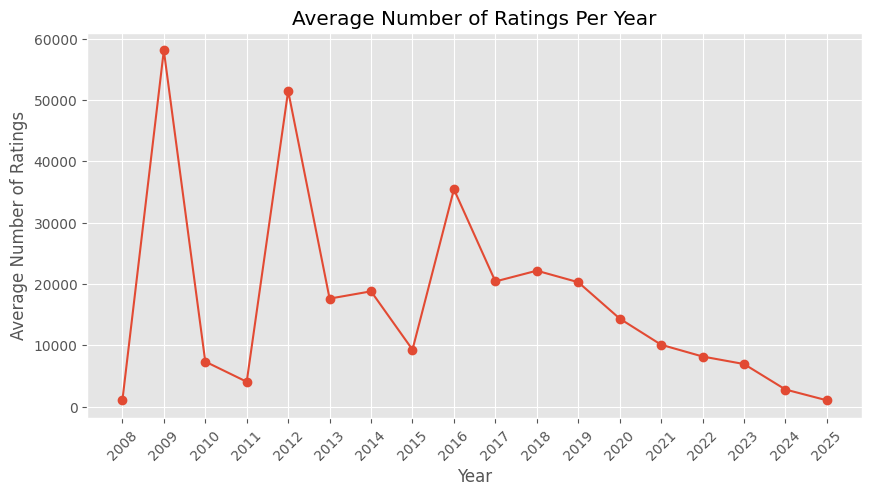

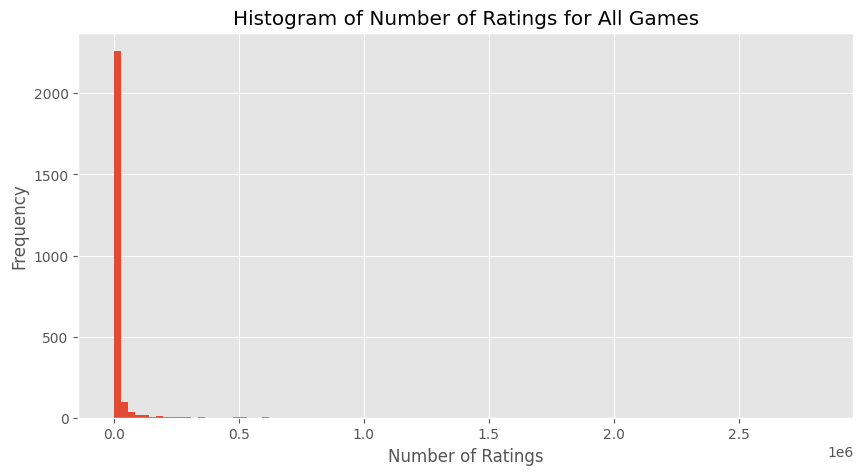

In [204]:
#variable for total number of ratings per year 
ratings_per_year = pd_major_games.groupby("Year")["Number of Ratings"].sum()

#plot number of ratings per year
plt.figure(figsize=(10, 5))
plt.plot(ratings_per_year.index, ratings_per_year.values,marker = 'o', linestyle='solid')
#add labels, ticks, and title
plt.xticks(ticks=range(2008, 2026), rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Number of Ratings")
plt.title("Total Number of Ratings Per Year")
plt.show()

avg_ratings_per_year = pd_major_games.groupby("Year")["Number of Ratings"].mean()
#plot number of ratings per year
plt.figure(figsize=(10, 5))
plt.plot(avg_ratings_per_year.index, avg_ratings_per_year.values,marker = 'o', linestyle='solid')
#add labels, ticks, and title
plt.xticks(ticks=range(2008, 2026), rotation=45)
plt.xlabel("Year")
plt.ylabel("Average Number of Ratings")
plt.title("Average Number of Ratings Per Year")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(pd_major_games["Number of Ratings"], bins=100)
plt.title("Histogram of Number of Ratings for All Games")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()


**Your interpretation**:

* Based on these plots that I created there are some trends that might suggest why there is so much spread in the number of ratings in earlier years.

* It appears that there was a large increase in the sheer volume of games up until 2016, which may reflect the expansion of the gaming industry occurring as technology continued to advance. As more and more games were released each year, more and more ratings continue to accumulate.

* As the number of games increased, the average number of ratings could decreased due to the fact that the volume of games that are released means that there are more games with lower amount of ratings as a product of the amount. This would diminish the average number of ratings over time. In addition, more popular games would start to gain popularity, but the accumulation of ratings that they garner is being diluted by the volume of lower rating games.

* The zig-zag pattern may reflect technological advances in the gaming industry during each of the major years on the graph (2009, 2012, 2016). A cursory search of those dates with the gaming industry shows several hints as to why there could have been a boom in the number of games and the popularity of games. 2009 showed improved Nintendo DS, the release of Playstation GO (digital only platform to eliminate need for discs). OnLive, one of the first cloud-based gaming systems which helped pave the way for streaming. In 2012, Nintendo Wii U was released as well as the Playstation Vita (a handheld console), and the Steam's development of significant PC gaming technology. 2016 showed the release of Nintendo Switch, Playstation VR (a Sony VR headset), and XBox One. Taken together this would make sense as to why the zig-zag pattern is apparent in the plots.

* The histogram that I created is significantly right-skewed which suggests that most of the games in the dataset have few ratings while a smaller number of games have high ratings. This means that there are few popular games that are receiving the bulk of the user market and the majority of the games are actually less popular with less ratings.

* The skewed nature suggests that the 250 threshold might be too low as lots of the games have fewer than this number of ratings. A more appropriate threshold might be higher, where the games start to accumulate substantial number of ratings which would more accurately reflect popularity. 

## Task 3 Reflecting

Succinctly describe what you referenced to help you do the assignment and what the biggest challenges were.

**Your interpretation**

* My references included:  
* https://docs.python.org/3/library/time.html#time.process_time
* https://matplotlib.org/stable/users/index.html
* https://docs.python.org/3/library/csv.html
* https://www.geeksforgeeks.org/manipulating-dataframes-with-pandas-python/
* Lecture 6 (06-loading-data-dataframes) example dataframe manipulation. 
* Pandas cheat sheet PDF
* BMI6018

* This assignment was fairly straighforward and I found the lecture material very helpful as I was able to compare my code to the class code and the explanations for how to iterate and navigate filtering dataframes were extremely helpful. This allowed me to play with this dataset and try code in simular ways to gain understanding of how it worked.
* I found the biggest challenge to be the timing portion of the assignment in problem 2.3 which used the time process time code to determine the amount of time the code takes to run. I could not understand why the code only said 14 seconds however it took much longer than that to display, which is still a question I have. Overall this was the hardest problem. 
* Creating the plots was a great way to get experience displaying data and being able to interpret the trends in the data.
* The groupby function was very quick and great way to succinctly visualize data.
* Overall I found this assignment extremely helpful to see how to filter data and use a mask to create dataframes to your advantage.
* Being able to manipulate data in this way is a good skill that I want to continue to practice and develop especially with datasets that are not possible to navigate given the sheer amount of data. 
* I feel I could have spent a lot of time trying to analyze the major games with various thresholds. I feel that separating the data out into different bins and sub-analyzing them might display some trends to explain the larger dataset and why the major games are so contibutory to the averages and whether or not a different threshold would be better. 